In [24]:
import numpy as np

def run_simulation(dt,a,b,N):
    x = np.zeros(N+1)
    x[0] = 0.
    sqrt_2dt = np.sqrt(2*dt)
    for i in range(N):
        x[i+1] = x[i] - dt*(x[i]+a)*(a*(x[i]+a)/2-1)**2 + sqrt_2dt*(1+b*x[i]/2)*np.random.normal()
    return x

In [41]:
a = 0.1
b = 0.0
dt = 0.05
N = 20000000
x1 = run_simulation(dt,a,b,N)
print(np.mean(x1))

a = 0.0
b = 0.1
x2 = run_simulation(dt,a,b,N)
print(np.mean(x2))

a = 0.1
b = 0.1
x3 = run_simulation(dt,a,b,N)
print(np.mean(x3))

a = 0.1
b = -0.1
x4 = run_simulation(dt,a,b,N)
print(np.mean(x4))

0.004087288406644461
0.0010848005098660126
0.005968155557436455
0.0031477962635429926


In [42]:
func1 = np.zeros(N)
func2 = np.zeros(N)
func3 = np.zeros(N)
func4 = np.zeros(N)
for tau in range(200):
    func1[tau] = np.mean(x1[tau:]*x1[:N+1-tau])
    func2[tau] = np.mean(x2[tau:]*x2[:N+1-tau])
    func3[tau] = np.mean(x3[tau:]*x3[:N+1-tau])
    func4[tau] = np.mean(x4[tau:]*x4[:N+1-tau])

In [43]:
func1f = np.zeros(N)
func1b = np.zeros(N)
func2f = np.zeros(N)
func2b = np.zeros(N)
func3f = np.zeros(N)
func3b = np.zeros(N)
func4f = np.zeros(N)
func4b = np.zeros(N)
for tau in range(200):
    func1f[tau] = np.mean(x1[tau:]*x1[:N+1-tau]**2)
    func1b[tau] = np.mean(x1[tau:]**2*x1[:N+1-tau])
    func2f[tau] = np.mean(x2[tau:]*x2[:N+1-tau]**2)
    func2b[tau] = np.mean(x2[tau:]**2*x2[:N+1-tau])
    func3f[tau] = np.mean(x3[tau:]*x3[:N+1-tau]**2)
    func3b[tau] = np.mean(x3[tau:]**2*x3[:N+1-tau])
    func4f[tau] = np.mean(x4[tau:]*x4[:N+1-tau]**2)
    func4b[tau] = np.mean(x4[tau:]**2*x4[:N+1-tau])

In [27]:
import matplotlib.pyplot as plt
t_arr = np.arange(0., 10., dt)

a = 0.1
b = 0
func1t = 2*(a+b)*np.exp(-t_arr) + 2*a*(np.exp(-t_arr) - np.exp(-2*t_arr))

a = 0
b = 0.1
func2t = 2*(a+b)*np.exp(-t_arr) + 2*a*(np.exp(-t_arr) - np.exp(-2*t_arr))

a = 0.1
b = 0.1
func3t = 2*(a+b)*np.exp(-t_arr) + 2*a*(np.exp(-t_arr) - np.exp(-2*t_arr))

a = 0.1
b = -0.1
func4t = 2*(a+b)*np.exp(-t_arr) + 2*a*(np.exp(-t_arr) - np.exp(-2*t_arr))

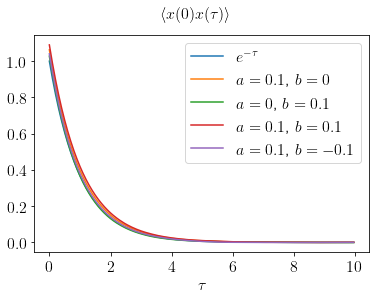

In [44]:
plt.rcParams['text.usetex'] = True
plt.figure()
plt.suptitle(r'$\langle x(0) x(\tau) \rangle$', fontsize=16)
plt.plot(t_arr, np.exp(-t_arr), label=r"$e^{-\tau}$")
plt.plot(t_arr, func1[0:200], label=r"$a=0.1$, $b=0$")
plt.plot(t_arr, func2[0:200], label=r"$a=0$, $b=0.1$")
plt.plot(t_arr, func3[0:200], label=r"$a=0.1$, $b=0.1$")
plt.plot(t_arr, func4[0:200], label=r"$a=0.1$, $b=-0.1$")
plt.tick_params(axis='both', labelsize=16)
plt.xlabel(r'$\tau$', fontsize=16)
plt.legend(fontsize=16)
#plt.savefig("./images/figures_document2/cov.svg")
plt.show()

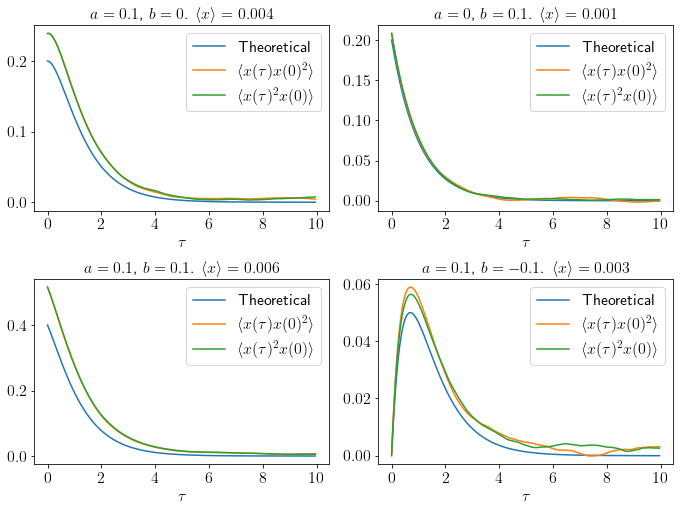

In [46]:
plt.rcParams['text.usetex'] = True
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6.4*1.5, 4.8*1.5))
axes[0,0].set_title(r'$a = 0.1$, $b = 0$. $\langle x \rangle = 0.004$', fontsize=16)
axes[0,0].plot(t_arr, func1t[0:200], label='Theoretical')
axes[0,0].plot(t_arr, func1f[0:200], label=r'$\langle x(\tau) x(0)^2 \rangle$')
axes[0,0].plot(t_arr, func1b[0:200], label=r'$\langle x(\tau)^2 x(0) \rangle$')
axes[0,0].tick_params(axis='both', labelsize=16)
axes[0,0].set_xlabel(r'$\tau$', fontsize=16)
axes[0,0].legend(fontsize=16)
axes[0,1].set_title(r'$a = 0$, $b = 0.1$. $\langle x \rangle = 0.001$', fontsize=16)
axes[0,1].plot(t_arr, func2t[0:200], label='Theoretical')
axes[0,1].plot(t_arr, func2f[0:200], label=r'$\langle x(\tau) x(0)^2 \rangle$')
axes[0,1].plot(t_arr, func2b[0:200], label=r'$\langle x(\tau)^2 x(0) \rangle$')
axes[0,1].tick_params(axis='both', labelsize=16)
axes[0,1].set_xlabel(r'$\tau$', fontsize=16)
axes[0,1].legend(fontsize=16)
axes[1,0].set_title(r'$a = 0.1$, $b = 0.1$. $\langle x \rangle = 0.006$', fontsize=16)
axes[1,0].plot(t_arr, func3t[0:200], label='Theoretical')
axes[1,0].plot(t_arr, func3f[0:200], label=r'$\langle x(\tau) x(0)^2 \rangle$')
axes[1,0].plot(t_arr, func3b[0:200], label=r'$\langle x(\tau)^2 x(0) \rangle$')
axes[1,0].tick_params(axis='both', labelsize=16)
axes[1,0].set_xlabel(r'$\tau$', fontsize=16)
axes[1,0].legend(fontsize=16)
axes[1,1].set_title(r'$a = 0.1$, $b = -0.1$. $\langle x \rangle = 0.003$', fontsize=16)
axes[1,1].plot(t_arr, func4t[0:200], label='Theoretical')
axes[1,1].plot(t_arr, func4f[0:200], label=r'$\langle x(\tau) x(0)^2 \rangle$')
axes[1,1].plot(t_arr, func4b[0:200], label=r'$\langle x(\tau)^2 x(0) \rangle$')
axes[1,1].tick_params(axis='both', labelsize=16)
axes[1,1].set_xlabel(r'$\tau$', fontsize=16)
axes[1,1].legend(fontsize=16)
plt.tight_layout()
#plt.savefig("./images/figures_document2/cov3.svg")
plt.show()

In [1]:
import numpy as np
# d = dimension
def run_simulation2(d,dt,N):
    x = np.zeros((N+1,d))
    #x[0] = 0.
    sqrt_2dt = np.sqrt(2*dt)
    for i in range(N):
        x[i+1] = (1.-dt)*x[i] + sqrt_2dt*np.random.normal(size=d)
    return x

In [6]:
dt = 0.05
ds = [1, 5, 10, 20, 50] # dimension
Ns = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000] # number of time-steps
means = np.zeros((len(ds), len(Ns)))
Vars = np.zeros((len(ds), len(Ns)))
drift_sq = np.zeros((len(ds), len(Ns)))
for i, d in enumerate(ds):
    print(i,d)
    for j, N in enumerate(Ns):
        print("\t",j,N)
        As = np.zeros(1000)
        drift_sqs = np.zeros(1000)
        for k in range(1000):
            x = run_simulation2(d,dt,N)
            A = np.linalg.solve(x[:-1].T@x[:-1], x[:-1].T@(x[1:]-x[:-1])).T/dt
            C = (x.T@x)/len(x)
            As[k] = A[0,0]
            drift_sqs[k] = (A@C@A.T)[0,0]
        means[i,j] = np.mean(As)
        Vars[i,j] = np.mean((As-means[i,j])**2)
        drift_sq[i,j] = np.mean(drift_sqs)

0 1
	 0 200
	 1 400
	 2 600
	 3 800
	 4 1000
	 5 1200
	 6 1400
	 7 1600
	 8 1800
	 9 2000
1 5
	 0 200
	 1 400
	 2 600
	 3 800
	 4 1000
	 5 1200
	 6 1400
	 7 1600
	 8 1800
	 9 2000
2 10
	 0 200
	 1 400
	 2 600
	 3 800
	 4 1000
	 5 1200
	 6 1400
	 7 1600
	 8 1800
	 9 2000
3 20
	 0 200
	 1 400
	 2 600
	 3 800
	 4 1000
	 5 1200
	 6 1400
	 7 1600
	 8 1800
	 9 2000
4 50
	 0 200
	 1 400
	 2 600
	 3 800
	 4 1000
	 5 1200
	 6 1400
	 7 1600
	 8 1800
	 9 2000


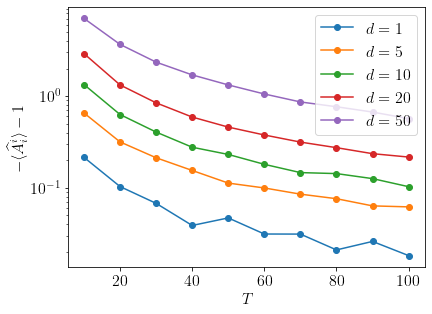

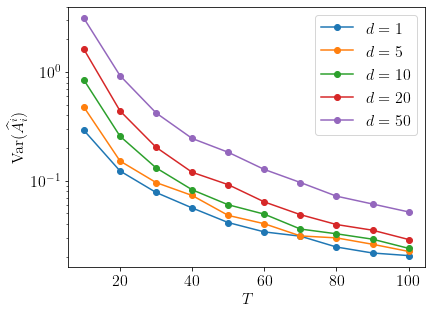

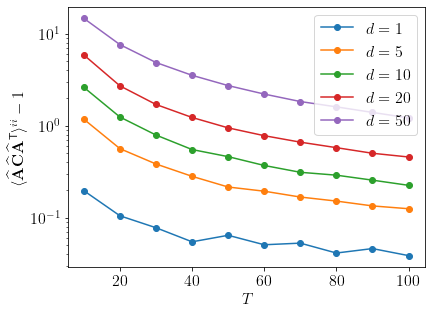

In [7]:
import matplotlib.pyplot as plt
labels = [r"$d = 1$", r"$d = 5$", r"$d = 10$", r"$d = 20$", r"$d = 50$"]
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(6.4,4.8))
for i, d in enumerate(ds):
    plt.plot(np.array(Ns)*dt, -means[i,:]-1, label=labels[i], marker='o')
plt.yscale("log")
plt.xlabel(r"$T$", fontsize=16)
plt.ylabel(r"$-\langle \widehat{A}^i_i \rangle-1$", fontsize=16)
plt.tick_params(axis='both', labelsize=16)
plt.legend(fontsize=16)
#plt.savefig("./images/figures_document2/fig7.svg")
plt.show()

plt.figure(figsize=(6.4,4.8))
for i, d in enumerate(ds):
    plt.plot(np.array(Ns)*dt, Vars[i,:], label=labels[i], marker='o')
plt.yscale("log")
plt.xlabel(r"$T$", fontsize=16)
plt.ylabel(r"$\mathrm{Var}(\widehat{A}^i_i)$", fontsize=16)
plt.tick_params(axis='both', labelsize=16)
plt.legend(fontsize=16)
#plt.savefig("./images/figures_document2/fig8.svg")
plt.show()

plt.figure(figsize=(6.4,4.8))
for i, d in enumerate(ds):
    plt.plot(np.array(Ns)*dt, drift_sq[i,:]-1, label=labels[i], marker='o')
plt.yscale("log")
plt.xlabel(r"$T$", fontsize=16)
plt.ylabel(r"$\langle \widehat{\mathbf{A}} \widehat{\mathbf{C}} \widehat{\mathbf{A}}^{\mathsf T} \rangle^{ii}-1$", fontsize=16)
plt.tick_params(axis='both', labelsize=16)
plt.legend(fontsize=16)
#plt.savefig("./images/figures_document2/fig9.svg")
plt.show()

In [80]:
import numpy as np
# Appendix
N = 100000000
x = np.zeros(N+1)
sqrt_pt05 = np.sqrt(.05)
sqrt_dt = np.zeros(N)
dt = np.zeros(N)
my_sums = np.zeros(N+1)
for i in range(N):
    dt[i] = 0.05/(1.+x[i]**4)
    x[i+1] = (1.-dt[i])*x[i] + np.sqrt(dt[i]*(1.+x[i]**6))*np.random.normal()

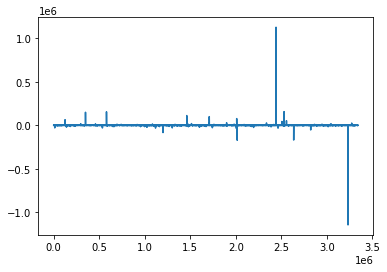

In [2]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.cumsum(dt[:]), x[1:])
plt.show()

In [96]:
x_min = -2.5
x_max = 2.5
bins = 20
dx = (x_max-x_min)/bins
sum_dxs = np.zeros(bins)
sum_ts = np.zeros(bins)
inds = np.array(np.floor((x[:]-x_min)/dx), dtype=np.int64)
M = 10000000
for i in range(M):
    j = inds[i]
    if j>=bins or j<0: continue
    sum_dxs[j] += x[i+1]-x[i]
    sum_ts[j] += dt[i]
results = sum_dxs/sum_ts

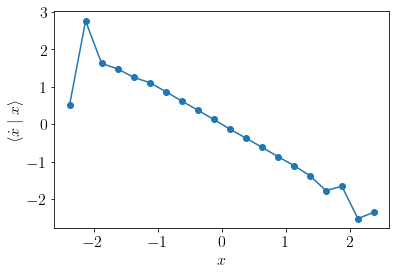

In [99]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.arange(x_min+dx/2, x_max, dx), results[:], marker='o')
plt.xlabel(r'$x$', fontsize=16)
plt.ylabel(r'$\langle \dot x \mid x \rangle$', fontsize=16)
plt.tick_params(axis='both', labelsize=16)
#plt.savefig("./images/figures_document2/binned.svg")
plt.show()

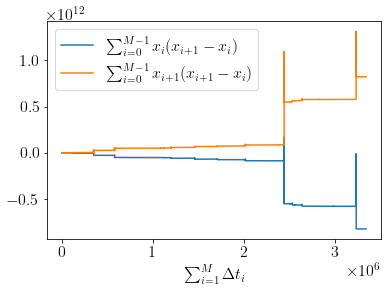

In [3]:
plt.rcParams['text.usetex'] = True
fig, ax = plt.subplots()
plt.plot(np.cumsum(dt[:]), np.cumsum(x[:-1]*(x[1:]-x[:-1])), label=r"$\sum_{i=0}^{M-1} x_i (x_{i+1} - x_i)$")
plt.plot(np.cumsum(dt[:]), np.cumsum(x[1:]*(x[1:]-x[:-1])), label=r"$\sum_{i=0}^{M-1} x_{i+1} (x_{i+1} - x_i)$")
plt.tick_params(axis='both', labelsize=16)
ax.xaxis.get_offset_text().set_fontsize(16)
ax.yaxis.get_offset_text().set_fontsize(16)
plt.xlabel(r'$\sum_{i=1}^M \Delta t_i$', fontsize=16)
plt.legend(fontsize=16)
#plt.savefig("./images/figures_document2/infinite2.svg")
plt.show()

In [7]:
dtau = 0.005
n = 20
ts = np.zeros(N+1)
ts[1:] = np.cumsum(dt[:])
M = 300000
T = np.sum(dt[:M])
covs = np.zeros(n)
covs[0] = np.sum(dt[:M]*x[:M]**2)/T
for i in range(1,n):
    tau = i*dtau
    print(i)
    for j in range(M):
        covs[i] += max(0, (dt[j]-tau))*x[j]**2
        k_max = np.searchsorted(ts[:M], ts[j+1]+tau)
        k_min = np.searchsorted(ts[j+2:M+1], ts[j]+tau)+j+1
        for k in range(k_min,k_max):
            covs[i] += min(min(ts[j+1]-ts[j], ts[k+1]-ts[k]), min(tau-(ts[k]-ts[j+1]), (ts[k+1]-ts[j])-tau))*x[j]*x[k]
    covs[i] /= T-tau

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


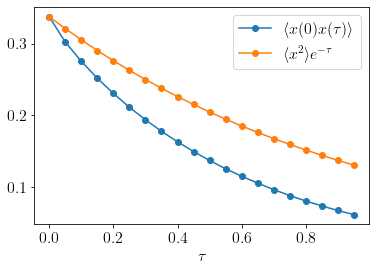

In [6]:
plt.rcParams['text.usetex'] = True
plt.figure()
plt.plot(np.arange(0., 1., 0.05), covs[:], marker='o', label=r"$\langle x(0) x(\tau) \rangle$")
plt.plot(np.arange(0., 1., 0.05), covs[0]*np.exp(-np.arange(0., 1., 0.05)), marker='o', label=r"$\langle x^2 \rangle e^{-\tau}$")
plt.tick_params(axis='both', labelsize=16)
plt.xlabel(r'$\tau$', fontsize=16)
plt.legend(fontsize=16)
#plt.savefig("./images/figures_document2/counterexample.svg")
plt.show()

In [1]:
# Test case for computation of covariance function: Ornstein-Uhlenbeck process with variable time-step
import numpy as np
M = 300000
y = np.zeros(M+1)
du = np.zeros(M)
for i in range(M):
    du[i] = 0.01 + 0.04*np.random.uniform()
    y[i+1] = (1.-du[i])*y[i] + np.sqrt(2*du[i])*np.random.normal()

In [2]:
dtau = 1e-1
n = 10
us = np.zeros(M+1)
us[1:] = np.cumsum(du[:])
U = np.sum(du[:M])
covsy = np.zeros(n)
covsy[0] = np.sum(du[:M]*y[:M]**2)/U
for i in range(1,n):
    tau = i*dtau
    print(i)
    for j in range(M):
        covsy[i] += max(0, (du[j]-tau))*y[j]**2
        k_max = np.searchsorted(us[:M], us[j+1]+tau)
        k_min = np.searchsorted(us[j+2:M+1], us[j]+tau)+j+1
        for k in range(k_min,k_max):
            assert(us[k]-us[j+1]<tau)
            assert(us[k+1]-us[j]>tau)
            covsy[i] += min(min(us[j+1]-us[j], us[k+1]-us[k]), min(tau-(us[k]-us[j+1]), (us[k+1]-us[j])-tau))*y[j]*y[k]
    covsy[i] /= U-tau

1
2
3
4
5
6
7
8
9


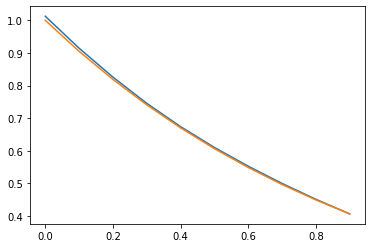

In [3]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.arange(0., 1., 0.1), covsy[:])
plt.plot(np.arange(0., 1., 0.1), np.exp(-np.arange(0., 1., 0.1)))
plt.show()

In [55]:
import numpy as np
# Stochastic rotation frequency
def run_simulation3(lamb,omega,Dxx,Dyy,dt,N):
    x = np.zeros(N+1)
    y = np.zeros(N+1)
    #x[0] = 0.
    sqrt_2dt_Dxx = np.sqrt(2*dt*Dxx)
    sqrt_2dt_Dyy = np.sqrt(2*dt*Dyy)
    for i in range(N):
        x[i+1] = (1.-dt*lamb)*x[i] - dt*omega*y[i] + sqrt_2dt_Dxx*np.random.normal()
        y[i+1] = (1.-dt*lamb)*y[i] + dt*omega*x[i] + sqrt_2dt_Dyy*np.random.normal()
    return x, y

In [66]:
N = 200000
dt = 0.005
lamb = 1
omega = 1
x, y = run_simulation3(lamb,omega,1,10,dt,N)

In [67]:
phi = np.arctan2(y,x)
phi_rev = np.zeros(N+1)
phi_rev[0] = phi[0]
for i in range(N):
    phi_rev[i+1] = phi_rev[i] + (phi[i+1] - phi[i] + np.pi)%(2*np.pi) - np.pi

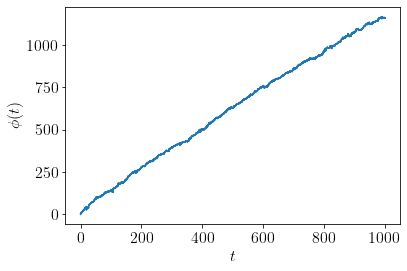

In [69]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
fig, ax = plt.subplots()
plt.plot(np.arange(0., dt*(N+1), dt), phi_rev[:])
plt.tick_params(axis='both', labelsize=16)
plt.xlabel(r'$t$', fontsize=16)
plt.ylabel(r'$\phi(t)$', fontsize=16)
#plt.savefig("./images/figures_document2/phi.svg")
plt.show()